In [1]:
# STEP 1: Import Libraries & Load Dataset

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

# Set dataset directories
train_dir = "/kaggle/input/fer2013/train"
test_dir = "/kaggle/input/fer2013/test"

# Image parameters
img_size = (48, 48)
batch_size = 64

# ImageDataGenerators for train/test
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2,
                                   shear_range=0.1, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

# See class labels
print("Class indices:", train_generator.class_indices)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/fer2013/train'

In [ ]:
# STEP 2: Build & Train the Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Build the CNN
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 485s 1s/step - accuracy: 0.2427 - loss: 2.1378 - val_accuracy: 0.3232 - val_loss: 1.7162
Epoch 2/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 440s 932ms/step - accuracy: 0.3257 - loss: 1.6662 - val_accuracy: 0.4241 - val_loss: 1.5166
Epoch 3/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 411s 916ms/step - accuracy: 0.3657 - loss: 1.5855 - val_accuracy: 0.3755 - val_loss: 1.6224
Epoch 4/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 406s 905ms/step - accuracy: 0.4124 - loss: 1.5109 - val_accuracy: 0.4733 - val_loss: 1.3497
Epoch 5/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 417s 929ms/step - accuracy: 0.4407 - loss: 1.4384 - val_accuracy: 0.4570 - val_loss: 1.3989
Epoch 6/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 447s 941ms/step - accuracy: 0.4525 - loss: 1.4126 - val_accuracy: 0.4992 - val_loss: 1.3285
Epoch 7/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 399s 888ms/step - accuracy: 0.4825 - loss: 1.3635 - val_accuracy: 0.5286 - val_loss: 1.2407
Epoch 8/25
449/449 ━━━━━━━━━━━━━━━━━━━━ 410s 913ms/step - accuracy: 0.4883 - lo

113/113 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.5909 - loss: 1.1254
Test Accuracy: 0.59


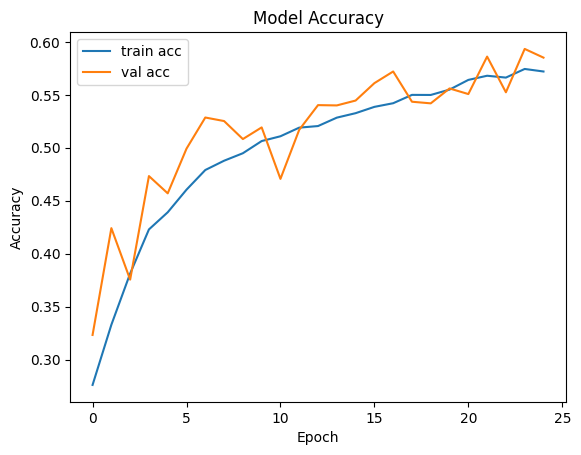

In [ ]:
# STEP 3: Evaluate & Plot

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [ ]:
import numpy as np
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


# JavaScript to take a photo using webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        // Resize the output to fit the video element.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        // Wait for Capture to be clicked.
        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getTracks().forEach(track => track.stop());
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
      takePhoto({quality: %s});
    ''' % quality)
    display(js)
    data = eval_js("takePhoto({quality: %s})" % quality)
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename


# Load Haarcascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Map index to emotion
emotion_labels = list(train_generator.class_indices.keys())

# TAKE photo
filename = take_photo()

# Read the captured image
frame = cv2.imread(filename)

# Convert to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

# For each detected face
for (x, y, w, h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi = cv2.resize(roi_gray, (48, 48))  # Same as model input size
    roi = roi.astype('float') / 255.0
    roi = np.expand_dims(roi, axis=0)
    roi = np.expand_dims(roi, axis=-1)

    # Predict emotion
    prediction = model.predict(roi)
    label = emotion_labels[np.argmax(prediction)]

    # Draw rectangle and label
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(frame, label, (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Show the final image with prediction
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'train_generator' is not defined